In [30]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [31]:
IMG_SHAPE=224
train_data_dir="/content/drive/My Drive/Yoga/Dataset/Data/train"
validation_data_dir="/content/drive/My Drive/Yoga/Dataset/Data/validation"

In [32]:
datagen=ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
)

In [33]:
batch_size=16
train_generator=datagen.flow_from_directory(
          train_data_dir,
          target_size=(IMG_SHAPE,IMG_SHAPE),
          batch_size=batch_size,
          class_mode='categorical'
)

Found 30 images belonging to 3 classes.


In [34]:
validation_generator=datagen.flow_from_directory(
      validation_data_dir,
      target_size=(IMG_SHAPE,IMG_SHAPE),
      batch_size=batch_size,
      class_mode='categorical'
)


Found 9 images belonging to 3 classes.


In [35]:
sample_training_images, _ = next(train_generator)

In [36]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

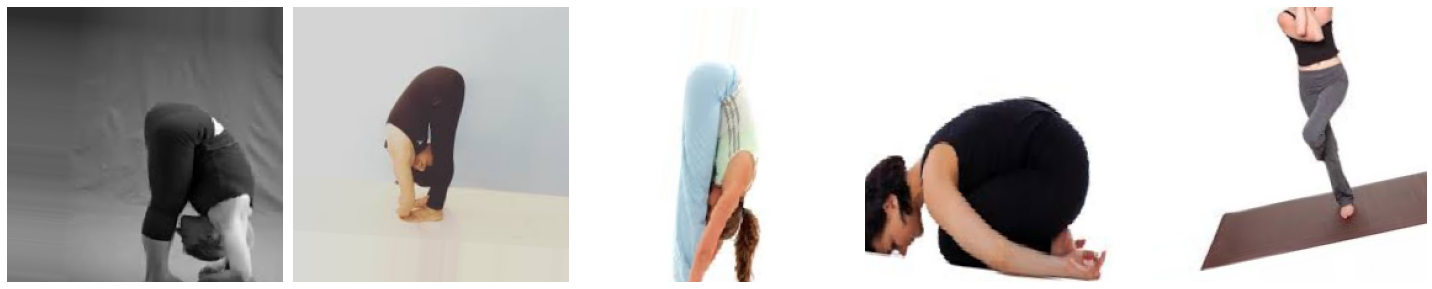

In [37]:
plotImages(sample_training_images[:5])

In [38]:
IMAGE_RES=224
import tensorflow as tf

URL = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
feature_extractor = hub.KerasLayer(URL,input_shape=(IMAGE_RES,IMAGE_RES,3))

feature_extractor.trainable=False

model = tf.keras.Sequential([
    feature_extractor,

    tf.keras.layers.Dense(3,activation='softmax')]
         
)

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 2048)              23561152  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6147      
Total params: 23,567,299
Trainable params: 6,147
Non-trainable params: 23,561,152
_________________________________________________________________


In [40]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [41]:
EPOCHS=20
history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 1.2509 - accuracy: 0.2333 - val_loss: 1.3059 - val_accuracy: 0.4444
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 0.9461 - accuracy: 0.4667 - val_loss: 0.9486 - val_accuracy: 0.5556
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 0.7203 - accuracy: 0.7333 - val_loss: 0.7384 - val_accuracy: 0.6667
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.5486 - accuracy: 0.8667 - val_loss: 0.6183 - val_accuracy: 0.7778
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 0.4243 - accuracy: 0.9333 - val_loss: 0.4211 - val_accuracy: 0.8889
Epoch 6/20
2/2 [==============================] - 4s 2s/step - loss: 0.3051 - accuracy: 0.9333 - val_loss: 0.5006 - val_accuracy: 0.8889
Epoch 7/20
2/2 [==============================] - 4s 2s/step - loss: 0.2265 - accuracy: 0.9667 - val_loss: 0.4935 - val_accuracy: 0.8889
Epoch 8/20
2/2 [=========================

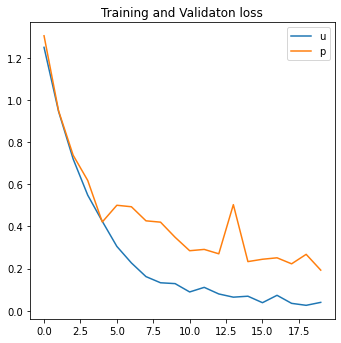

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(12,12))
plt.subplot(1,2,1)

plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend('lower right')
plt.title('Training and Validaton Accuracy')

plt.subplot(2,2,1)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend('upper right')
plt.title('Training and Validaton loss')

plt.show()

In [47]:
test_dir="/content/drive/My Drive/Yoga/Dataset/images/test/test"

In [44]:
import PIL.Image as Image
class_names=['balasana' , 'garudasana' , 'padangusthasana']

garudasana
garudasana
balasana
balasana
padangusthasana
padangusthasana


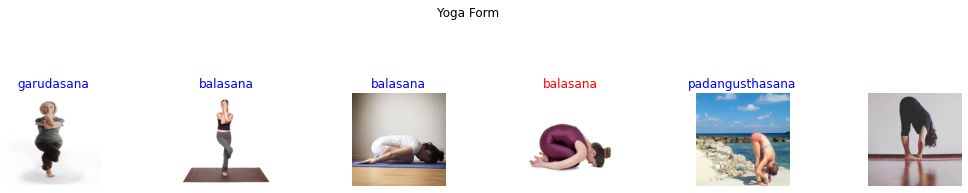

In [62]:
i=0
plt.figure(figsize=(18,12))
import os
for files in os.listdir(test_dir):
    image=os.path.join(test_dir,files)
    image=Image.open(image).resize((IMG_SHAPE,IMG_SHAPE))
    image=np.array(image)/255.0
    result=model.predict(image[np.newaxis, ...])
    predicted_class=np.argmax(result[0],axis=-1)
    title=class_names[predicted_class]
    f=files.split(" ")[0]
    print(f)

    if title==f:
      plt.title(title,color='blue')
    else:
      plt.title(title,color='red')

    plt.axis('off')
    plt.subplot(6,6,i+1)
    plt.subplots_adjust(hspace = 0.2)
    i+=1
    plt.axis('off')
    plt.imshow(image)

_ = plt.suptitle("Yoga Form")